# Who feeds the world ? And how wealthy are they ?
There are folium maps in this notebook. If they do not display well, please have a look at the .html file from the same repo.

## Abstract <a name="abstract"></a>

Our main goal in this project is to find social and economic world-wide relations of countries based on the state of their agricultural sector, using indicators such as imports, exports, production, self-sufficiency, etc. In order to find such indicators, we would like to use the data from the "Global Food & Agriculture Statistics" datasets. First, we would like to produce a map showing which countries "feed the world" i.e. which countries are net-exporting food. That map would contain a slider to show how this evolved over the past fifty years. Then we would like to show countrywise the level of food self-sufficiency i.e. the way a country does not need to trade with other ones in order to feed its population. We will also compare it to nations' economic development and see if some correlations can be found. We will visualize our best findings with several interactive maps and plots.

## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- How does the production and consumption of food look like from a geographical point of view ? Which countries are net food exporters or importers? How did this evolve over the last few decades ?
- What's the level of self-sufficiency in food production of individual countries and how does this change over time ?
- Is there a link between the GDP per capita and the agricultural trade balance ? Are countries that are net exporters or importers richer ? Are self-sufficient countries richer ?
- If we find any relations, are they also still valid if we check for specific crops ? Are there some crops that are mostly produced by richer countries, some that are mostly produced by poorer countries?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Prices of food](#2B)  
                
    3. [Structure of international trade](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Giving countries an economic score based on their agricultural features](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display

**Auxiliary function imports:**

We have implemented some functions into a dedicated module (file `Milestone_2_scripts.py`) in order to simplify the code and make this notebook more enjoyable to read.

In [2]:
#from Milestone_2_scripts import *

**Setup:**

In [3]:
data_folder_path = "./Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Crops trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)        
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset would be a subset of the "Global Food & Agriculture Statistics" that is found in the proposed datasets list. In this dataset, we have seen that we could work with the production as well as import and export quantities per year and per country. We will add information about countries GDP to this database.

### 1.B. Loading the data set  <a name="1B"></a>

In [4]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We load each interresting dataset in the dictionary `df` :

In [5]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to get a first sense of the data.

In [6]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [7]:
display_df(df, interesting_datasets)

'Crops production'

Area Code                              Area  Item Code           Item  \
760678         93                             Haiti         27    Rice, paddy   
961040        113                        Kyrgyzstan        526       Apricots   
275928         32                          Cameroon        667            Tea   
183769         19  Bolivia (Plurinational State of)        523        Quinces   
579517         61                 Equatorial Guinea        656  Coffee, green   

        Element Code         Element  Year Code  Year    Unit    Value Flag  
760678          5525            Seed       1988  1988  tonnes   5040.0   Fc  
961040          5510      Production       1995  1995  tonnes  10000.0    *  
275928          5312  Area harvested       2005  2005      ha   1664.0   Im  
183769          5419           Yield       1980  1980   hg/ha  59787.0   Fc  
579517          5510      Production       1999  1999  tonnes   3500.0  NaN

'Crops trade'

Area Code                        Area  Item Code  \
5090930         102  Iran (Islamic Republic of)        882   
9060204         195                     Senegal       1968   
2276122          96        China, Hong Kong SAR       2027   
13679235       5404              Western Europe       2073   
7037668         149                       Nepal        249   

                              Item  Element Code          Element  Year Code  \
5090930      Milk, whole fresh cow          5910  Export Quantity       1986   
9060204   Groundnuts Total Shelled          5622     Import Value       1972   
2276122              Meat of Swine          5622     Import Value       1981   
13679235                   Pigmeat          5910  Export Quantity       2004   
7037668                   Coconuts          5922     Export Value       1975   

          Year      Unit      Value Flag  
5090930   1986    tonnes        0.0  NaN  
9060204   1972  1000 US$        0.0    A  
2276122   1981  1000 US$    63516.0    A  
13679235  2004    tonnes  3278728.0    A  
7037668   1975  1000 US$        NaN    M

'Consumer price indices'

Area Code       Area  Item Code  \
12373         46      Congo      23012   
53835        216   Thailand      23012   
34950        138     Mexico      23012   
59670        181   Zimbabwe      23013   
51380         38  Sri Lanka      23012   

                                                Item  Months Code   Months  \
12373  Consumer Prices, General Indices (2010 = 100)         7005      May   
53835  Consumer Prices, General Indices (2010 = 100)         7010  October   
34950  Consumer Prices, General Indices (2010 = 100)         7006     June   
59670     Consumer Prices, Food Indices (2010 = 100)         7007     July   
51380  Consumer Prices, General Indices (2010 = 100)         7010  October   

       Year Code  Year  Unit      Value Flag     Note  
12373       2004  2004   NaN  75.501336    X     2010  
53835       2003  2003   NaN  80.880701    X     2010  
34950       2010  2010   NaN  99.135234    X     2010  
59670       2016  2016   NaN  89.900000    X  2012M12  
51380       2008  2008   NaN  93.846876    X     2010

'Macroeconomy'

Area Code                              Area  Item Code  \
472054        217                              Togo      22075   
441129        203                             Spain      22016   
430053        198                          Slovenia      22016   
257793        120  Lao People's Democratic Republic      22016   
418198        196                        Seychelles      22008   

                                                   Item  Element Code  \
472054                Value Added (Total Manufacturing)          6117   
441129  Value Added (Agriculture, Forestry and Fishing)          6109   
430053  Value Added (Agriculture, Forestry and Fishing)          6157   
257793  Value Added (Agriculture, Forestry and Fishing)          6131   
418198                           Gross Domestic Product          6129   

                                 Element  Year Code  Year      Unit  \
472054  Share of GDP in US$, 2005 prices       1979  1979         %   
441129              Value Local Currency       1972  1972  millions   
430053    Share of GDP in Local Currency       1997  1997         %   
257793    Annual growth US$, 2005 prices       2003  2003         %   
418198                 Annual growth US$       1976  1976         %   

              Value Flag  
472054     6.648691   Fc  
441129  2208.019040  XAM  
430053     3.535819   Fc  
257793     2.510745   Fc  
418198     3.087315   Fc

'Livestock production'

Area Code                 Area  Item Code     Item  Element Code  \
116434        220  Trinidad and Tobago       1096   Horses          5111   
72271         134                Malta       1068    Ducks          5112   
48679          86              Grenada        976    Sheep          5111   
114928        217                 Togo        866   Cattle          5111   
34346          54              Denmark       1079  Turkeys          5112   

       Element  Year Code  Year       Unit     Value Flag  
116434  Stocks       1984  1984       Head    1000.0    F  
72271   Stocks       1993  1993  1000 Head       NaN    M  
48679   Stocks       1990  1990       Head   12400.0    F  
114928  Stocks       1965  1965       Head  170454.0  NaN  
34346   Stocks       1980  1980  1000 Head     382.0  NaN

'Live animals trade'

Area Code                              Area  Item Code       Item  \
326079        156                       New Zealand       1126     Camels   
425934        203                             Spain       1181   Beehives   
623293       5500                           Oceania       1126     Camels   
646340       5802  Land Locked Developing Countries        946  Buffaloes   
20753          10                         Australia       1126     Camels   

        Element Code          Element  Year Code  Year      Unit    Value Flag  
326079          5608  Import Quantity       1976  1976      Head      NaN    M  
425934          5907  Export Quantity       1987  1987        No      NaN    M  
623293          5622     Import Value       2012  2012  1000 US$    132.0    A  
646340          5608  Import Quantity       1985  1985      Head  26000.0    A  
20753           5922     Export Value       2013  2013  1000 US$    745.0  NaN

At first glance, our datasets seem very clean.

Each of our dataset contains a column "Year" and a column that is either named "Area" or "Country". This is a great news for us since we want to do a both geographical and time-related analysis.

The columns "Area" and "Country" both correspond to the country except that the "Area" may contains a group of country (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will clean the datasets. The final goal is to produce one uniformized and normalized dataset on which we could work (see [1.F](#1F)).

Such a cleaned dataset may look like this  (in a very simplistic way):

    Country | Year | GDP | Crops production | Livestock production

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes without the unuseful data.

In [8]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>

In [9]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [10]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

In [11]:
display(df_useful["GDP"].sample(5))

Area Code        Area  Year        Value
295980        136  Mauritania  1978   856.916477
116461         48  Costa Rica  1970  1173.170423
111465         46       Congo  2002  3019.993723
413351        195     Senegal  1981  2699.143564
49151          53       Benin  1998  2653.251820

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>

In [12]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [13]:
df_useful['Crops Area harvested'] = food_crop_area_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Seed'] = food_crop_seed_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Yield'] =  food_crop_yield_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [14]:
display(df_useful['Crops Area harvested'].sample(5))
display(df_useful['Crops Production'].sample(5))
display(df_useful['Crops Seed'].sample(5))
display(df_useful['Crops Yield'].sample(5))

Area Code         Area                   Item  Year Unit     Value
1200777        156  New Zealand               Avocados  2010   ha    3798.0
983361         121      Lebanon                Lentils  1984   ha    3700.0
205343          21       Brazil              Nuts, nes  2005   ha    3657.0
151498          23       Belize  Roots and tubers, nes  1989   ha       6.0
798809         100        India                 Garlic  2014   ha  231000.0

Area Code                       Area                    Item  Year  \
1245574        162                     Norway     Carrots and turnips  1964   
1087674        137                  Mauritius                 Bananas  1996   
417147          47               Cook Islands        Lemons and limes  1990   
2478042       5801  Least Developed Countries  Karite nuts (sheanuts)  1964   
1010855        124                      Libya  Roots and Tubers,Total  2002   

           Unit     Value  
1245574  tonnes   39486.0  
1087674  tonnes    9387.0  
417147   tonnes     250.0  
2478042  tonnes  117550.0  
1010855  tonnes  195000.0

Area Code                                     Area             Item  \
2170964       5300                                     Asia         Rapeseed   
392616          44                                 Colombia  Oil, palm fruit   
1308108        169                                 Paraguay         Soybeans   
1438727        184                                   Rwanda          Sorghum   
2572719       5817  Net Food Importing Developing Countries          Cassava   

         Year    Unit    Value  
2170964  1962  tonnes  78384.0  
392616   2004  tonnes      0.0  
1308108  1977  tonnes  12249.0  
1438727  2011  tonnes   1943.0  
2572719  1997  tonnes    103.0

Area Code                  Area                              Item  \
1535814        202          South Africa                       Peas, green   
1618846        212  Syrian Arab Republic  Anise, badian, fennel, coriander   
2230086       5303         Southern Asia                           Spinach   
457226          49                  Cuba           Jute & Jute-like Fibres   
2461353       5706        European Union                               Rye   

         Year   Unit    Value  
1535814  1989  hg/ha  68793.0  
1618846  1992  hg/ha   4992.0  
2230086  1995  hg/ha  96412.0  
457226   2002  hg/ha  42235.0  
2461353  1977  hg/ha  22769.0

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

In [15]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'

df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [16]:
display(df_useful['Livestock production'].sample(5))

Area Code              Area                    Item  Year       Unit  \
1679            4           Algeria                Chickens  1966  1000 Head   
135781       5105    Western Africa                   Asses  2004       Head   
105110        198          Slovenia                   Ducks  1993  1000 Head   
32647          51    Czechoslovakia       Rabbits and hares  1964  1000 Head   
137997       5203  Northern America  Geese and guinea fowls  2006  1000 Head   

            Value  
1679      11300.0  
135781  4817803.0  
105110       35.0  
32647      1860.0  
137997      300.0

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>

In [17]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [18]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code       Area      Item  Year       Unit   Value
13734           9  Argentina    Cattle  1968       Head   184.0
477651        230    Ukraine  Chickens  1998  1000 Head  3000.0
140281         54    Denmark    Cattle  2006       Head   230.0
351624        166     Panama  Chickens  2009  1000 Head  1473.0
58651          20   Botswana   Turkeys  1995  1000 Head     NaN

In [19]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code        Area             Item  Year       Unit     Value
384322        183     Romania  Sheep and Goats  1984       Head  678100.0
398109        244       Samoa             Pigs  2006       Head       0.0
238451        106       Italy            Mules  2004       Head       0.0
237567        106       Italy         Chickens  1968  1000 Head      60.0
307370        144  Mozambique         Chickens  2013  1000 Head       NaN

In [20]:
selection_import_quantities = df['Crops trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Crops trade']["Element"] == 'Export Quantity'

df_useful['Crops import quantities'] = df['Crops trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops export quantities'] = df['Crops trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [21]:
display(df_useful['Crops import quantities'].sample(5))

Area Code       Area                                  Item  Year  \
9185618         200  Singapore                        Cake, soybeans  1978   
4525612          90     Guinea       Juice, grapefruit, concentrated  1966   
4385968          86    Grenada  Meat, cattle, boneless (beef & veal)  1977   
11780241       5000      World                          Maize, green  1985   
5888653         119     Latvia              Cereal preparations, nes  2007   

            Unit     Value  
9185618   tonnes  171823.0  
4525612   tonnes       NaN  
4385968   tonnes       NaN  
11780241  tonnes   25229.0  
5888653   tonnes    2473.0

In [22]:
display(df_useful['Crops export quantities'].sample(5))

Area Code                                     Area  \
12048526       5102                            Middle Africa   
13962589       5503                               Micronesia   
14475369       5817  Net Food Importing Developing Countries   
5916827         119                                   Latvia   
12685355       5207                            South America   

                          Item  Year    Unit    Value  
12048526  Oil, coconut (copra)  1989  tonnes    210.0  
13962589     Oranges+Tang+Clem  2003  tonnes    160.0  
14475369                Apples  2009  tonnes  22046.0  
5916827      Oranges+Tang+Clem  1999  tonnes    126.0  
12685355        Cake, rapeseed  1980  tonnes  43340.0

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

In [23]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area',"Year",'Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [24]:
display(df_useful['Consumer price indices'].sample(5))

Area  Year       Value
2993                                 Tajikistan  2015  143.467664
3017  The former Yugoslav Republic of Macedonia  2003   86.691140
2573           Saint Vincent and the Grenadines  2003   75.764372
1656                                 Kyrgyzstan  2009   95.995947
982                                 El Salvador  2006   87.877155

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the areas which are real countries are exactely the ones with an "Area Code" below 5000.

In [25]:
#remove Area code >= 5000
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<5000
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code        Area  Year         Value
194441         86     Grenada  1975  5.096111e+01
184279         79     Germany  2013  3.752514e+06
454239        210      Sweden  1989  2.148762e+05
199483         90      Guinea  1989  3.562030e+03
36984          16  Bangladesh  1989  2.695455e+04

Removing areas which are not countries in Crops Area harvested


Area Code       Area                    Item  Year Unit     Value
1134388        143    Morocco     Lettuce and chicory  1969   ha      10.0
1720310        223     Turkey  Roots and Tubers,Total  2002   ha  198028.0
50915            9  Argentina              Artichokes  1996   ha    4000.0
945041         114      Kenya     Pepper (piper spp.)  1999   ha     509.0
1106036        138     Mexico                 Oranges  1964   ha   78151.0

Removing areas which are not countries in Crops Production


Area Code                 Area                Item  Year    Unit  \
1599946        210               Sweden        Beans, green  1995  tonnes   
1400124        146  Republic of Moldova              Garlic  2010  tonnes   
1248598        162               Norway                 Rye  1990  tonnes   
1310474        169             Paraguay  Citrus Fruit,Total  1993  tonnes   
88444           11              Austria      Cherries, sour  1969  tonnes   

            Value  
1599946       NaN  
1400124   10984.0  
1248598    3200.0  
1310474  298756.0  
88444      3325.0

Removing areas which are not countries in Crops Seed


Area Code                      Area                       Item  Year  \
1040755        130                    Malawi  Cereals (Rice Milled Eqv)  1994   
1811533        235                Uzbekistan                        Rye  2009   
315087          40                     Chile                       Oats  1995   
83195           10                 Australia                    Vetches  1986   
297998          37  Central African Republic                Rice, paddy  1965   

           Unit    Value  
1040755  tonnes  43218.0  
1811533  tonnes    210.0  
315087   tonnes  12130.0  
83195    tonnes    121.0  
297998   tonnes    490.0

Removing areas which are not countries in Crops Yield


Area Code    Area       Item  Year   Unit     Value
690955          84  Greece     Olives  1986  hg/ha   18540.0
1669896        217    Togo    Sorghum  1987  hg/ha    7166.0
942705         114   Kenya      Maize  1964  hg/ha   11714.0
1096458        138  Mexico  Asparagus  2010  hg/ha   54786.0
1440415        184  Rwanda       Yams  1965  hg/ha  125000.0

Removing areas which are not countries in Livestock production


Area Code                                   Area  \
7884          13                                Bahrain   
20421         33                                 Canada   
63357        108                             Kazakhstan   
32839        116  Democratic People's Republic of Korea   
66821        122                                Lesotho   

                         Item  Year       Unit     Value  
7884            Poultry Birds  2001  1000 Head     470.0  
20421  Geese and guinea fowls  1979  1000 Head     342.0  
63357           Poultry Birds  2003  1000 Head   23791.0  
32839                  Cattle  1961       Head  672000.0  
66821                   Goats  1970       Head  897149.0

Removing areas which are not countries in Live animals import quantities


Area Code      Area               Item  Year       Unit   Value
365222        173    Poland           Beehives  1986         No     NaN
388263        184    Rwanda    Bovine, Animals  1965       Head     0.0
185307         79   Germany             Horses  1966       Head  3861.0
80447         115  Cambodia  Rabbits and hares  2008  1000 Head     0.0
283273        131  Malaysia            Turkeys  1975  1000 Head     NaN

Removing areas which are not countries in Live animals export quantities


Area Code         Area      Item  Year  Unit      Value
318620        150  Netherlands    Camels  1974  Head        NaN
420336        201      Somalia     Goats  2007  Head  1612572.0
347656        165     Pakistan  Beehives  1963    No        NaN
248898        112       Jordan     Sheep  2010  Head   123233.0
438385        209    Swaziland     Goats  2005  Head        0.0

Removing areas which are not countries in Crops import quantities


Area Code     Area                         Item  Year    Unit   Value
2865116         98  Croatia  Juice, citrus, concentrated  2011  tonnes    18.0
9078549        272   Serbia                Meat of Swine  2007  tonnes  1296.0
4787929         97  Hungary                 Mustard seed  1986  tonnes    47.0
6912812         28  Myanmar               Flax fibre raw  1987  tonnes     0.0
7508832        159  Nigeria                  Sesame seed  1982  tonnes     NaN

Removing areas which are not countries in Crops export quantities


Area Code                   Area  \
4287997          84                 Greece   
8559947         183                Romania   
9092323         186  Serbia and Montenegro   
10575918        226                 Uganda   
9163981         197           Sierra Leone   

                                         Item  Year    Unit  Value  
4287997   Buttermilk, curdled, acidified milk  2003  tonnes  690.0  
8559947                Peaches and nectarines  1995  tonnes  151.0  
9092323                                   Rye  1993  tonnes    0.0  
10575918                       Flour, mustard  2002  tonnes    NaN  
9163981                      Oil, palm kernel  1965  tonnes    0.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

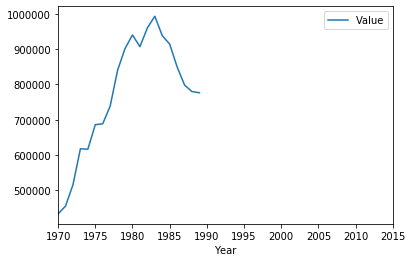

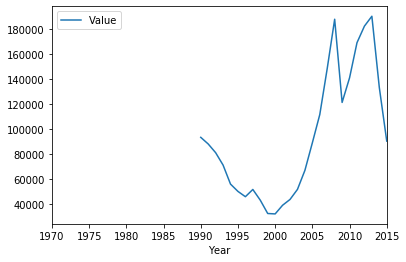

In [26]:
df_useful["GDP"][df_useful["GDP"]['Area']=='USSR'].plot(x ='Year', y='Value', kind = 'line')
df_useful["GDP"][df_useful["GDP"]['Area']=='Ukraine'].plot(x ='Year', y='Value', kind = 'line')

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


In [27]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
print (countries_formation_years)

{1990: [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')], 2005: [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')], 1989: [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')], 1999: [('Kosovo', '+')], 2012: [('Netherlands Antilles (former)', '-')], 2008: [('South Sudan', '+'), ('Sudan', '+')], 2007: [('Sudan (former)', '-')], 1988: [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]}


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with country names and normalizing the features.

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>

In [28]:
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea"}

def correct_country_names(old_name):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name


In [29]:
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(correct_country_names)

GDP
Crops Area harvested
Crops Production
Crops Seed
Crops Yield
Livestock production
Live animals import quantities
Live animals export quantities
Crops import quantities
Crops export quantities
Consumer price indices


In [30]:
def visualise_world_data_folium(df, year, logScale=True):
    dic = {'USSR':                            ['Armenia', 'Azerbaijan','Belarus', 'Estonia', 'Georgia',
                                               'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
                                               'Montenegro', 'Republic of Moldova', 'Russia',
                                               'Republic of Serbia', 'Timor-Leste', 'Turkmenistan', 'Ukraine',
                                               'Uzbekistan'],
           'Ethiopia PDR':                     ['Eritrea','Ethiopia'],
           'Yugoslav SFR':                     ['Kosovo', 'Slovenia', 'Croatia',
                                                'Macedonia', 'Bosnia and Herzegovina'],
           'Yemen Dem' :                       ['Yemen'],        
           'Czechoslovakia':                   ["Czech Republic", 'Slovakia'],
           'Netherlands Antilles (former)':    ['Curaçao', 'Sint Maarten (Dutch Part)'],
           'Sudan (former)':                   ['South Sudan', 'Sudan']
          }
    def add_new_names(old_name):
        if old_name in dic.keys() :
            return dic[old_name]
        return old_name
    to_plot=df[df["Year"]==year]
    to_plot=(to_plot[['Area','Value']]
             .dropna()
             .groupby('Area')             
             .mean()
             .reset_index()
             .dropna())    
    to_plot['Area']=to_plot['Area'].apply(add_new_names)
    to_plot = to_plot.explode('Area')
    if logScale :
        to_plot.Value=np.log10(to_plot.Value)
    
    m = folium.Map(location=[40,-10],zoom_start=1.6)
    folium.Choropleth(
        geo_data=f"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",
        data=to_plot,
        columns=['Area', 'Value'],
        key_on='feature.properties.name',
        fill_color='YlGn',fill_opacity=0.7,line_opacity=0.2,nan_fill_opacity=0.0
    ).add_to(m)

    folium.LayerControl().add_to(m)

    return(m)

In [31]:
display(visualise_world_data_folium(df_useful["GDP"], 1985, True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

TODO, explain why (heavy tail, right skewed, power laws) + do it

For instance the distribution of GDP look a bit like a power law.

C:\Users\Martin\.conda\envs\ada\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Martin\.conda\envs\ada\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


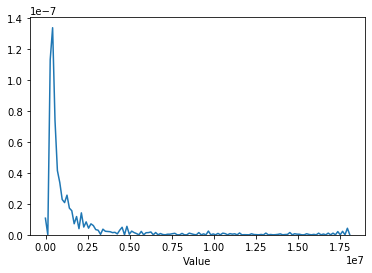

In [32]:
sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

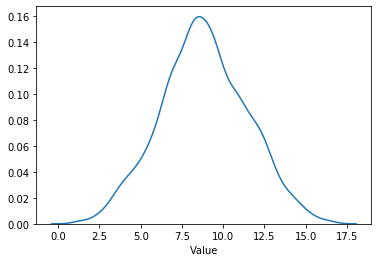

In [33]:
#looks better with log scale
sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one uniformized dataframe `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation | CPI
    
In this uniformized dataframe, a tuple `(Country, Year)` uniquely identifies a row.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

In [34]:
need_pivot = ['Crops Area harvested',
              'Crops Production',
              'Crops Seed',
              'Crops Yield',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Crops import quantities',
              'Crops export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_useful[df_name].sample(5))

Item              Anise, badian, fennel, coriander Crops Area harvested  \
Unit                                                                 ha   
Area         Year                                                         
Turkmenistan 2001                                                NaN      
Afghanistan  1992                                              700.0      
Uzbekistan   1994                                                NaN      
Azerbaijan   2010                                                NaN      
Albania      2009                                                NaN      

Item              Apples Crops Area harvested Apricots Crops Area harvested  \
Unit                                       ha                            ha   
Area         Year                                                             
Turkmenistan 2001                      6000.0                        1700.0   
Afghanistan  1992                      2316.0                        4992.0   
Uzbekistan   1994                     80600.0                       13500.0   
Azerbaijan   2010                     23934.0                        2484.0   
Albania      2009                      5000.0                         300.0   

Item              Areca nuts Crops Area harvested  \
Unit                                           ha   
Area         Year                                   
Turkmenistan 2001                             NaN   
Afghanistan  1992                             NaN   
Uzbekistan   1994                             NaN   
Azerbaijan   2010                             NaN   
Albania      2009                             NaN   

Item              Artichokes Crops Area harvested  \
Unit                                           ha   
Area         Year                                   
Turkmenistan 2001                             NaN   
Afghanistan  1992                             NaN   
Uzbekistan   1994                            95.0   
Azerbaijan   2010                             NaN   
Albania      2009                             NaN   

Item              Asparagus Crops Area harvested  \
Unit                                          ha   
Area         Year                                  
Turkmenistan 2001                            NaN   
Afghanistan  1992                            NaN   
Uzbekistan   1994                            NaN   
Azerbaijan   2010                            NaN   
Albania      2009                            NaN   

Item              Avocados Crops Area harvested  \
Unit                                         ha   
Area         Year                                 
Turkmenistan 2001                           NaN   
Afghanistan  1992                           NaN   
Uzbekistan   1994                           NaN   
Azerbaijan   2010                           NaN   
Albania      2009                           NaN   

Item              Bambara beans Crops Area harvested  \
Unit                                              ha   
Area         Year                                      
Turkmenistan 2001                                NaN   
Afghanistan  1992                                NaN   
Uzbekistan   1994                                NaN   
Azerbaijan   2010                                NaN   
Albania      2009                                NaN   

Item              Bananas Crops Area harvested Barley Crops Area harvested  \
Unit                                        ha                          ha   
Area         Year                                                            
Turkmenistan 2001                          NaN                     45000.0   
Afghanistan  1992                          NaN                    250000.0   
Uzbekistan   1994                          NaN                    348600.0   
Azerbaijan   2010                          NaN                    264624.0   
Albania      2009                          NaN                      1700.0   

Item            

Item             Anise, badian, fennel, coriander Crops Production  \
Unit                                                        tonnes   
Area        Year                                                     
New Zealand 1990                                               NaN   
Portugal    2013                                               NaN   
Germany     1983                                               NaN   
Malaysia    1987                                               NaN   
Angola      1964                                               NaN   

Item             Apples Crops Production Apricots Crops Production  \
Unit                              tonnes                    tonnes   
Area        Year                                                     
New Zealand 1990                361000.0                   10284.0   
Portugal    2013                287314.0                    2157.0   
Germany     1983               2097458.0                    1503.0   
Malaysia    1987                     NaN                       NaN   
Angola      1964                     NaN                       NaN   

Item             Areca nuts Crops Production Artichokes Crops Production  \
Unit                                  tonnes                      tonnes   
Area        Year                                                           
New Zealand 1990                         NaN                         NaN   
Portugal    2013                         NaN                         NaN   
Germany     1983                         NaN                         NaN   
Malaysia    1987                      3500.0                         NaN   
Angola      1964                         NaN                         NaN   

Item             Asparagus Crops Production Avocados Crops Production  \
Unit                                 tonnes                    tonnes   
Area        Year                                                        
New Zealand 1990                     8000.0                    2477.0   
Portugal    2013                        NaN                   18404.0   
Germany     1983                    14629.0                       NaN   
Malaysia    1987                        NaN                       NaN   
Angola      1964                        NaN                       NaN   

Item             Bambara beans Crops Production Bananas Crops Production  \
Unit                                     tonnes                   tonnes   
Area        Year                                                           
New Zealand 1990                            NaN                      NaN   
Portugal    2013                            NaN                  21204.0   
Germany     1983                            NaN                      NaN   
Malaysia    1987                            NaN                 485000.0   
Angola      1964                            NaN                 205000.0   

Item             Barley Crops Production  ... Sweet potatoes Crops Production  \
Unit                              tonnes  ...                          tonnes   
Area        Year                          ...                                   
New Zealand 1990                434856.0  ...                         12400.0   
Portugal    2013                 32950.0  ...                         22000.0   
Germany     1983              12826105.0  ...                             NaN   
Malaysia    1987                     NaN  ...                         26400.0   
Angola      1964                     NaN  ...                        140000.0   

Item             Tangerines, mandarins, clementines, satsumas Crops Production  \
Unit                                                                    tonnes   
Area        Year                                                                 
New Zealand 1990                                            14600.0              
Portugal    2013                                            34967.0              
Germany     1983

Item             Anise, badian, fennel, coriander Crops Seed  \
Unit                                                  tonnes   
Area        Year                                               
Netherlands 2011                                         NaN   
Eritrea     2008                                         NaN   
Rwanda      1979                                         NaN   
Maldives    1985                                         NaN   
Greece      1984                                         NaN   

Item             Bambara beans Crops Seed Bananas Crops Seed  \
Unit                               tonnes             tonnes   
Area        Year                                               
Netherlands 2011                      NaN                NaN   
Eritrea     2008                      NaN                NaN   
Rwanda      1979                      NaN                NaN   
Maldives    1985                      NaN                NaN   
Greece      1984                      NaN                NaN   

Item             Barley Crops Seed Beans, dry Crops Seed  \
Unit                        tonnes                tonnes   
Area        Year                                           
Netherlands 2011            3000.0                 410.0   
Eritrea     2008            4264.0                 171.0   
Rwanda      1979               0.0                7715.0   
Maldives    1985               NaN                   NaN   
Greece      1984           43680.0                2949.0   

Item             Broad beans, horse beans, dry Crops Seed  \
Unit                                               tonnes   
Area        Year                                            
Netherlands 2011                                    220.0   
Eritrea     2008                                     18.0   
Rwanda      1979                                      NaN   
Maldives    1985                                      NaN   
Greece      1984                                   1107.0   

Item             Buckwheat Crops Seed Cabbages and other brassicas Crops Seed  \
Unit                           tonnes                                  tonnes   
Area        Year                                                                
Netherlands 2011                  NaN                                     NaN   
Eritrea     2008                  NaN                                     NaN   
Rwanda      1979                  NaN                                     NaN   
Maldives    1985                  NaN                                     NaN   
Greece      1984                  NaN                                     NaN   

Item             Carrots and turnips Crops Seed Cassava Crops Seed  ...  \
Unit                                     tonnes             tonnes  ...   
Area        Year                                                    ...   
Netherlands 2011                            NaN                NaN  ...   
Eritrea     2008                            NaN                NaN  ...   
Rwanda      1979                            NaN                NaN  ...   
Maldives    1985                            NaN                NaN  ...   
Greece      1984                            NaN                NaN  ...   

Item             Sorghum Crops Seed Soybeans Crops Seed Sugar cane Crops Seed  \
Unit                         tonnes              tonnes                tonnes   
Area        Year                                                                
Netherlands 2011                NaN                 NaN                   NaN   
Eritrea     2008             5019.0                 NaN                   NaN   
Rwanda      1979             2892.0               193.0                   NaN   
Maldives    1985                NaN                 NaN                   NaN   
Greece      1984               20.0                 NaN                   NaN   

Item             Sweet potatoes Crops Seed Taro (cocoyam) Crops Seed  \
Unit                             

Item               Anise, badian, fennel, coriander Crops Yield  \
Unit                                                      hg/ha   
Area          Year                                                
Mauritania    1997                                          NaN   
Tuvalu        1996                                          NaN   
Ghana         1999                                          NaN   
Lesotho       2009                                          NaN   
New Caledonia 1982                                          NaN   

Item               Apples Crops Yield Apricots Crops Yield  \
Unit                            hg/ha                hg/ha   
Area          Year                                           
Mauritania    1997                NaN                  NaN   
Tuvalu        1996                NaN                  NaN   
Ghana         1999                NaN                  NaN   
Lesotho       2009                NaN                  NaN   
New Caledonia 1982                NaN                  NaN   

Item               Areca nuts Crops Yield Artichokes Crops Yield  \
Unit                                hg/ha                  hg/ha   
Area          Year                                                 
Mauritania    1997                    NaN                    NaN   
Tuvalu        1996                    NaN                    NaN   
Ghana         1999                    NaN                    NaN   
Lesotho       2009                    NaN                    NaN   
New Caledonia 1982                    NaN                    NaN   

Item               Asparagus Crops Yield Avocados Crops Yield  \
Unit                               hg/ha                hg/ha   
Area          Year                                              
Mauritania    1997                   NaN                  NaN   
Tuvalu        1996                   NaN                  NaN   
Ghana         1999                   NaN              47660.0   
Lesotho       2009                   NaN                  NaN   
New Caledonia 1982                   NaN                  NaN   

Item               Bambara beans Crops Yield Bananas Crops Yield  \
Unit                                   hg/ha               hg/ha   
Area          Year                                                 
Mauritania    1997                       NaN                 NaN   
Tuvalu        1996                       NaN                 NaN   
Ghana         1999                       NaN             30000.0   
Lesotho       2009                       NaN                 NaN   
New Caledonia 1982                       NaN             20933.0   

Item               Barley Crops Yield  ... Sweet potatoes Crops Yield  \
Unit                            hg/ha  ...                      hg/ha   
Area          Year                     ...                              
Mauritania    1997             8824.0  ...                    10000.0   
Tuvalu        1996                NaN  ...                        NaN   
Ghana         1999                NaN  ...                    13846.0   
Lesotho       2009             2529.0  ...                        NaN   
New Caledonia 1982                NaN  ...                    43421.0   

Item               Tangerines, mandarins, clementines, satsumas Crops Yield  \
Unit                                                                  hg/ha   
Area          Year                                                            
Mauritania    1997                                                NaN         
Tuvalu        1996                                                NaN         
Ghana         1999                                                NaN         
Lesotho       2009                                                NaN         
New Caledonia 1982                                                NaN         

Item               Taro (cocoyam) Crops Yield Tomatoes Crops Yield  \
Unit                                    hg/ha                hg/ha 

Item                                Animals live nes Livestock production  \
Unit                                                                 Head   
Area                           Year                                         
Cook Islands                   1981                                   NaN   
Niger                          1967                                   NaN   
Togo                           1990                                   NaN   
Occupied Palestinian Territory 1970                                   NaN   
Belgium-Luxembourg             1987                                   NaN   

Item                                Asses Livestock production  \
Unit                                                      Head   
Area                           Year                              
Cook Islands                   1981                        NaN   
Niger                          1967                   520000.0   
Togo                           1990                     3300.0   
Occupied Palestinian Territory 1970                        NaN   
Belgium-Luxembourg             1987                        NaN   

Item                                Beehives Livestock production  \
Unit                                      No Livestock production   
Area                           Year                                 
Cook Islands                   1981                          10.0   
Niger                          1967                           NaN   
Togo                           1990                           NaN   
Occupied Palestinian Territory 1970                           NaN   
Belgium-Luxembourg             1987                       25000.0   

Item                                Buffaloes Livestock production  \
Unit                                                          Head   
Area                           Year                                  
Cook Islands                   1981                            NaN   
Niger                          1967                            NaN   
Togo                           1990                            NaN   
Occupied Palestinian Territory 1970                            NaN   
Belgium-Luxembourg             1987                            NaN   

Item                                Camelids, other Livestock production  \
Unit                                                                Head   
Area                           Year                                        
Cook Islands                   1981                                  NaN   
Niger                          1967                                  NaN   
Togo                           1990                                  NaN   
Occupied Palestinian Territory 1970                                  NaN   
Belgium-Luxembourg             1987                                  NaN   

Item                                Camels Livestock production  \
Unit                                                       Head   
Area                           Year                               
Cook Islands                   1981                         NaN   
Niger                          1967                    850000.0   
Togo                           1990                         NaN   
Occupied Palestinian Territory 1970                         NaN   
Belgium-Luxembourg             1987                         NaN   

Item                                Cattle Livestock production  \
Unit                                                       Head   
Area                           Year                               
Cook Islands                   1981                       210.0   
Niger                          1967                   4320000.0   
Togo                           1990                    243000.0   
Occupied Palestinian Territory 1970                         NaN   
Belgium-Luxembourg             1987                   3190000.0   

Item                                Cattle and Buffaloes 

Item                                  Animals live nes Live animals import quantities  \
Unit                                                                             Head   
Area                             Year                                                   
Saint Vincent and the Grenadines 1970                                             NaN   
Cuba                             1973                                             NaN   
Denmark                          2009                                             0.0   
Nicaragua                        1986                                             NaN   
Saint Kitts and Nevis            1969                                             NaN   

Item                                  Asses Live animals import quantities  \
Unit                                                                  Head   
Area                             Year                                        
Saint Vincent and the Grenadines 1970                                  0.0   
Cuba                             1973                                  NaN   
Denmark                          2009                                  0.0   
Nicaragua                        1986                                  NaN   
Saint Kitts and Nevis            1969                                  NaN   

Item                                  Beehives Live animals import quantities  \
Unit                                        No Live animals import quantities   
Area                             Year                                           
Saint Vincent and the Grenadines 1970                                     NaN   
Cuba                             1973                                     NaN   
Denmark                          2009                                     NaN   
Nicaragua                        1986                                     NaN   
Saint Kitts and Nevis            1969                                     NaN   

Item                                  Bovine, Animals Live animals import quantities  \
Unit                                                                            Head   
Area                             Year                                                  
Saint Vincent and the Grenadines 1970                                            0.0   
Cuba                             1973                                         3330.0   
Denmark                          2009                                          182.0   
Nicaragua                        1986                                         1888.0   
Saint Kitts and Nevis            1969                                            0.0   

Item                                  Buffaloes Live animals import quantities  \
Unit                                                                      Head   
Area                             Year                                            
Saint Vincent and the Grenadines 1970                                      NaN   
Cuba                             1973                                      NaN   
Denmark                          2009                                      NaN   
Nicaragua                        1986                                      NaN   
Saint Kitts and Nevis            1969                                      NaN   

Item                                  Camelids, other Live animals import quantities  \
Unit                                                                            Head   
Area                             Year                                                  
Saint Vincent and the Grenadines 1970                                            NaN   
Cuba                             1973                                            NaN   
Denmark                          2009                                            NaN   
Nicaragua                        1986                                            NaN   
Saint Kitts and Nevis            19

Item                          Animals live nes Live animals export quantities  \
Unit                                                                     Head   
Area                     Year                                                   
New Zealand              1996                                             0.0   
Germany                  2005                                             NaN   
Malta                    1988                                             NaN   
Georgia                  1998                                             NaN   
Central African Republic 1964                                             NaN   

Item                          Asses Live animals export quantities  \
Unit                                                          Head   
Area                     Year                                        
New Zealand              1996                                  0.0   
Germany                  2005                                  0.0   
Malta                    1988                                  NaN   
Georgia                  1998                                  NaN   
Central African Republic 1964                                  NaN   

Item                          Beehives Live animals export quantities  \
Unit                                No Live animals export quantities   
Area                     Year                                           
New Zealand              1996                                     NaN   
Germany                  2005                                     NaN   
Malta                    1988                                     NaN   
Georgia                  1998                                     NaN   
Central African Republic 1964                                     NaN   

Item                          Bovine, Animals Live animals export quantities  \
Unit                                                                    Head   
Area                     Year                                                  
New Zealand              1996                                         4033.0   
Germany                  2005                                       657746.0   
Malta                    1988                                            0.0   
Georgia                  1998                                            NaN   
Central African Republic 1964                                            0.0   

Item                          Buffaloes Live animals export quantities  \
Unit                                                              Head   
Area                     Year                                            
New Zealand              1996                                      NaN   
Germany                  2005                                      NaN   
Malta                    1988                                      NaN   
Georgia                  1998                                      NaN   
Central African Republic 1964                                      NaN   

Item                          Camelids, other Live animals export quantities  \
Unit                                                                    Head   
Area                     Year                                                  
New Zealand              1996                                            NaN   
Germany                  2005                                            NaN   
Malta                    1988                                            NaN   
Georgia                  1998                                            NaN   
Central African Republic 1964                                            NaN   

Item                          Camels Live animals export quantities  \
Unit                                                           Head   
Area                     Year                                         
New Zealand              1996                                   NaN   
Germany                  2005                 

Item               Alfalfa meal and pellets Crops import quantities  \
Unit                                                         tonnes   
Area          Year                                                    
Cambodia      1985                                              NaN   
Samoa         1998                                              NaN   
Guinea-Bissau 1995                                              NaN   
Japan         1995                                         274160.0   
Cambodia      1982                                              NaN   

Item               Almonds shelled Crops import quantities  \
Unit                                                tonnes   
Area          Year                                           
Cambodia      1985                                     NaN   
Samoa         1998                                     NaN   
Guinea-Bissau 1995                                     NaN   
Japan         1995                                 22523.0   
Cambodia      1982                                     NaN   

Item               Animal Oil+Fat+Grs Crops import quantities  \
Unit                                                   tonnes   
Area          Year                                              
Cambodia      1985                                        0.0   
Samoa         1998                                      460.0   
Guinea-Bissau 1995                                        0.0   
Japan         1995                                   110801.0   
Cambodia      1982                                        0.0   

Item               Animal Vegetable Oil Crops import quantities  \
Unit                                                     tonnes   
Area          Year                                                
Cambodia      1985                                          0.0   
Samoa         1998                                        650.0   
Guinea-Bissau 1995                                       4270.0   
Japan         1995                                     798537.0   
Cambodia      1982                                          0.0   

Item               Animal fats Crops import quantities  \
Unit                                            tonnes   
Area          Year                                       
Cambodia      1985                                 0.0   
Samoa         1998                               460.0   
Guinea-Bissau 1995                                 0.0   
Japan         1995                            110801.0   
Cambodia      1982                                 0.0   

Item               Anise, badian, fennel, coriander Crops import quantities  \
Unit                                                                 tonnes   
Area          Year                                                            
Cambodia      1985                                                0.0         
Samoa         1998                                                NaN         
Guinea-Bissau 1995                                                NaN         
Japan         1995                                             5695.0         
Cambodia      1982                                                0.0         

Item               Apples Crops import quantities  \
Unit                                       tonnes   
Area          Year                                  
Cambodia      1985                            NaN   
Samoa         1998                           70.0   
Guinea-Bissau 1995                            0.0   
Japan         1995                         9295.0   
Cambodia      1982                            NaN   

Item               Apricots Crops import quantities  \
Unit                                         tonnes   
Area          Year                                    
Cambodia      1985                              NaN   
Samoa         1998                              NaN   
Guinea-Bissau 1995                              NaN   
Japan         1995     

Item                   Alfalfa meal and pellets Crops export quantities  \
Unit                                                             tonnes   
Area              Year                                                    
Cuba              1995                                              NaN   
Brazil            1996                                              NaN   
Ethiopia PDR      1990                                              NaN   
Ecuador           2005                                              0.0   
Equatorial Guinea 2005                                              NaN   

Item                   Almonds shelled Crops export quantities  \
Unit                                                    tonnes   
Area              Year                                           
Cuba              1995                                     NaN   
Brazil            1996                                     NaN   
Ethiopia PDR      1990                                     NaN   
Ecuador           2005                                     NaN   
Equatorial Guinea 2005                                     NaN   

Item                   Animal Oil+Fat+Grs Crops export quantities  \
Unit                                                       tonnes   
Area              Year                                              
Cuba              1995                                        NaN   
Brazil            1996                                    21773.0   
Ethiopia PDR      1990                                        NaN   
Ecuador           2005                                        0.0   
Equatorial Guinea 2005                                        NaN   

Item                   Animal Vegetable Oil Crops export quantities  \
Unit                                                         tonnes   
Area              Year                                                
Cuba              1995                                          NaN   
Brazil            1996                                    1460691.0   
Ethiopia PDR      1990                                        215.0   
Ecuador           2005                                     130882.0   
Equatorial Guinea 2005                                          0.0   

Item                   Animal fats Crops export quantities  \
Unit                                                tonnes   
Area              Year                                       
Cuba              1995                                 NaN   
Brazil            1996                             21773.0   
Ethiopia PDR      1990                                 NaN   
Ecuador           2005                                 0.0   
Equatorial Guinea 2005                                 NaN   

Item                   Anise, badian, fennel, coriander Crops export quantities  \
Unit                                                                     tonnes   
Area              Year                                                            
Cuba              1995                                                NaN         
Brazil            1996                                                5.0         
Ethiopia PDR      1990                                               60.0         
Ecuador           2005                                               14.0         
Equatorial Guinea 2005                                                NaN         

Item                   Apples Crops export quantities  \
Unit                                           tonnes   
Area              Year                                  
Cuba              1995                            NaN   
Brazil            1996                         3309.0   
Ethiopia PDR      1990                            NaN   
Ecuador           2005                            1.0   
Equatorial Guinea 2005                            NaN   

Item                   Apricots Crops export quantities  \
Unit                                             tonnes   
Area       

In [35]:
# Deal with the NaN that appeared
for df_name in df_useful :
    for column in list(df_useful[df_name]):
        if column not in ['Area', 'Year']:
            df_useful[df_name][column].fillna(df_useful[df_name][column].median(), inplace=True)

#### 1.F.b. Merging everything  <a name="1Fb"></a>

In [36]:
uni_df = df_useful['GDP']
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='outer', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='outer', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(uni_df[column].median(), inplace=True)
uni_df.sample(30)

C:\Users\Martin\.conda\envs\ada\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Area  Year  (GDP, million $)  \
8099                           Slovenia  2014      4.953015e+04   
345                           Argentina  1993      2.565731e+05   
12201                            Uganda  1966      6.406727e+03   
6381                        New Zealand  1998      5.717974e+04   
11097                              Iran  1968      6.406727e+03   
6134                              Nauru  1981      4.468777e+01   
7138                              Qatar  1973      1.503055e+03   
12335         Wallis and Futuna Islands  2011      6.406727e+03   
5738   Micronesia (Federated States of)  1999      2.205705e+02   
1055                             Bhutan  2013      1.798331e+03   
7166                              Qatar  2001      1.732887e+04   
1900                   China, Macao SAR  1984      1.292290e+03   
4624                              Kenya  1989      1.237919e+04   
4776                             Kuwait  2003      4.787399e+04   
13042                            Panama  2017      6.406727e+03   
12136                           Tokelau  2009      6.406727e+03   
3108                           Ethiopia  1991      1.278621e+04   
10130                    American Samoa  1985      6.406727e+03   
10419                            Canada  1965      6.406727e+03   
1261             British Virgin Islands  1989      1.562000e+02   
6698                           Pakistan  1993      6.213407e+04   
1728           Central African Republic  1996      1.054441e+03   
4545                             Jordan  2002      9.582471e+03   
3688                            Grenada  1973      4.007009e+01   
13089                      Sierra Leone  2016      6.406727e+03   
9157                       Turkmenistan  2014      4.348561e+04   
7362                             Russia  2013      2.230625e+06   
8895                               Togo  1982      8.207391e+02   
462                           Australia  1972      5.926926e+04   
9008                Trinidad and Tobago  2003      1.130546e+04   

       (Anise, badian, fennel, coriander Crops Area harvested, ha)  \
8099                                              1650.0             
345                                               3300.0             
12201                                             1650.0             
6381                                              1650.0             
11097                                            16000.0             
6134                                              1650.0             
7138                                              1650.0             
12335                                             1650.0             
5738                                              1650.0             
1055                                              1650.0             
7166                                              1650.0             
1900                                              1650.0             
4624                                               200.0             
4776                                              1650.0             
13042                                             1650.0             
12136                                             1650.0             
3108                                              1650.0             
10130                                             1650.0             
10419                                             1650.0             
1261                                              1650.0             
6698                                              1650.0             
1728                                              1650.0             
4545                                              1650.0             
3688                                              1650.0             
13089                                             1650.0             
9157                                              1650.0             
7362                                              9424.0           

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Prices of food](#2B)      
                
    3. [Structure of international trade](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Prices of food](#2B), then study the [structure of international trade](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
            1. [Crops](#2Aai)
            
                1. [Production](#2Aai1)
                
                2. [Importation](#2Aai2)
                
                3. [Exportation](#2Aai3)
    
            2. [Livestock](#2Aaii)  
            
                1. [Production](#2Aaii1)
                
                2. [Importation](#2Aaii2)
                
                3. [Exportation](#2Aaii3)
    
            2. [Globally](#2Aaiii)             
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
TODO

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the notion of food self-sufficiency.
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know whether a country produce all the food it needs or not. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how much does a country can satisfy to meet its internal consumption needs by production. It describes the extent to which a country is able to feed its population through its domestic food production.  We are interested into this measure since we think it could be correlated with the economic conditions of this country.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following formula that gives us the food self-sudfficiency as a percentage :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

In [37]:
all_columns = list(uni_df)
production_columns = []
import_columns = []
export_columns = []
for column in all_columns:
    if (type(column)==tuple) and column[1]=='tonnes':
        if 'export quantities' in column[0]:
            export_columns.append(column)
        elif 'import quantities' in column[0]:
            import_columns.append(column)
        elif 'Production' in column[0]:
            production_columns.append(column)
            
uni_df[('All productions','tonnes')] = 0
for column in production_columns :
    uni_df[('All productions','tonnes')] += uni_df[column]            
uni_df[('All imports','tonnes')] = 0
for column in import_columns :
    uni_df[('All imports','tonnes')] += uni_df[column]            
uni_df[('All exports','tonnes')] = 0
for column in export_columns :
    uni_df[('All exports','tonnes')] += uni_df[column]
            
uni_df[('food self-sufficiency','%')] = 100 * uni_df[('All productions','tonnes')] / (uni_df[('All productions','tonnes')]+uni_df[('All imports','tonnes')]+uni_df[('All exports','tonnes')])


In [38]:
display(uni_df[['Area','Year',('food self-sufficiency','%')]].sample(5))

Area  Year  (food self-sufficiency, %)
12397                  Yugoslav SFR  1963                   85.094088
466                       Australia  1976                   58.910509
5287                     Madagascar  2008                   93.321954
12577  United States Virgin Islands  1970                   91.903985
3579                          Ghana  2002                   92.443141

In [39]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df[('food self-sufficiency','%')]
for year in range(1980, 2010, 5):
    display(year, visualise_world_data_folium(plot, year, False))
    

C:\Users\Martin\.conda\envs\ada\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1980

1985

1990

1995

2000

2005

#### 2.B. Prices of food  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Prices](#2Ba) 
    
        2. [Stability of prices](#2Bb)      
        
TODO

#### 2.C. Structure of international trade  <a name="2C"></a>

2.  
                
    3. 
    
        1. [One word about historical context](#2Ca) 
    
        2. [Clusters, circularity and openness rates of international trade](#2Cb)   

TODO

#### 2.D. Economic classification of countries <a name="2D"></a>

In [43]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
for year in range(1980, 2015, 5):
    display(year, visualise_world_data_folium(plot, year, True))

C:\Users\Martin\.conda\envs\ada\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1980

1985

1990

1995

2000

2005

2010

### 3. Descriptive data analysis  <a name="3"></a>

3. 

    1. [Production and consumption of food from a time-space geography point of view](#3A)
        
        1. [Net food exporters or importers](#3Aa)
        
        2. [Evolution over the last few decades](#3Ab)

    1. [Food self-sufficiency](#3B)

    2. [Giving countries an economic score based on their agricultural features](#3C)
        
        1. [Correlation between food trade feature and GDP](#3Ca)
        
        2. [Our own score](#3Cb)
        
        2. [Machine learning model](#3Cc)  

    3. [Food prices stability and agricultural features](#3C)  
    
TODO

### 4. Informed plan for next actions  <a name="4"></a>

TODO